<a href="https://colab.research.google.com/github/JoYongJIn/YongJin-Repository/blob/main/CNN_(Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import os
import cv2
from google.colab.patches import cv2_imshow

# 이미지 폴더 경로 설정
carrot_folder = '/content/drive/MyDrive/Colab Notebooks/Images/Carrots/'
rocket_folder = '/content/drive/MyDrive/Colab Notebooks/Images/Rockets/'

# 이미지 불러오기 및 레이블링
data = []  # 데이터를 저장할 리스트
labels = []  # 레이블을 저장할 리스트

# 당근 이미지 불러오기 및 레이블링
for filename in os.listdir(carrot_folder):
    img = cv2.imread(os.path.join(carrot_folder, filename))
    if img is not None:
        data.append(img)
        labels.append(0)  # 당근을 '0'으로 레이블링

# 로켓 이미지 불러오기 및 레이블링
for filename in os.listdir(rocket_folder):
    img = cv2.imread(os.path.join(rocket_folder, filename))
    if img is not None:
        data.append(img)
        labels.append(1)  # 로켓을 '1'으로 레이블링


Total number of images loaded: 306
Total number of labels: 306
Label of image 1: 0


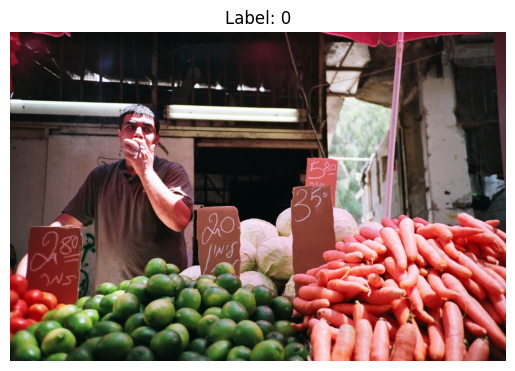

Label of image 2: 0


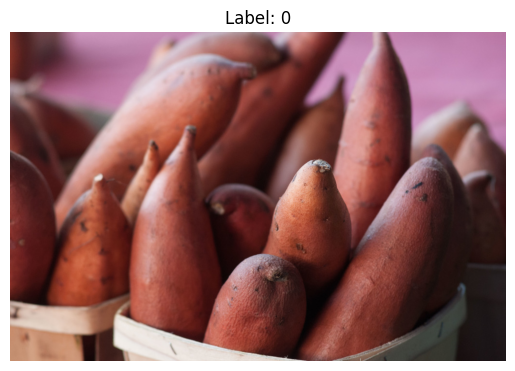

Label of image 3: 0


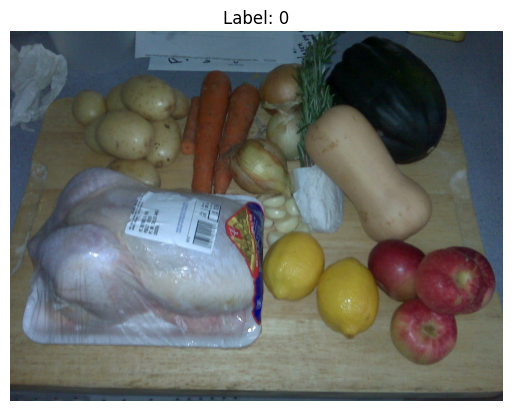

Label of image 4: 0


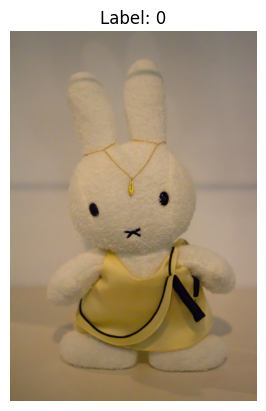

Label of image 5: 0


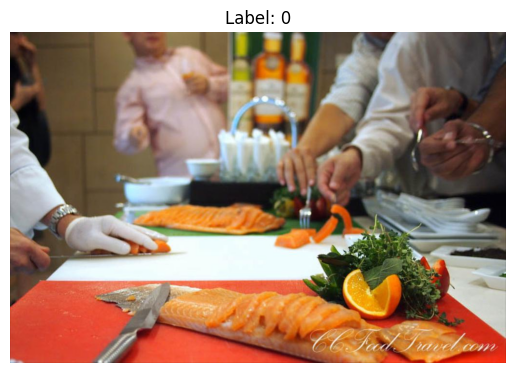

In [67]:
# 데이터가 잘 불러와졌는지 확인합니다.
import matplotlib.pyplot as plt

# 불러온 이미지 데이터의 수를 확인합니다.
print(f"Total number of images loaded: {len(data)}")
print(f"Total number of labels: {len(labels)}")

# 처음 5개의 이미지 데이터와 레이블을 출력합니다.
for i in range(5):
    print(f"Label of image {i+1}: {labels[i]}")
    plt.imshow(cv2.cvtColor(data[i], cv2.COLOR_BGR2RGB))  # OpenCV는 이미지를 BGR 포맷으로 불러오므로, RGB로 변환합니다.
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
    plt.show()


In [68]:
# 이미지 데이터를 같은 크기로 일치 시키고 원활히 학습시키기위해 0부터 1사이의 값으로 픽셀값을 정규화시키는 과정입니다.
resize_dim = (224, 224)  # 예를 들어, 이미지의 크기를 224x224로 설정합니다.

resized_data = []  # 크기가 조정된 이미지를 저장할 리스트
normalized_data = []  # 정규화된 이미지를 저장할 리스트

for img in data:
    # 이미지 크기 조정
    resized_img = cv2.resize(img, resize_dim, interpolation=cv2.INTER_AREA)

    # 색상 공간 변환 (예: RGB to GRAY, if needed)
    # converted_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)  # 예를 들어, 회색조로 변환

    # 이미지 정규화: 픽셀 값을 [0, 1] 범위로 조정
    normalized_img = resized_img / 255.0

    # 결과 저장
    resized_data.append(resized_img)
    normalized_data.append(normalized_img)

# 변환된 데이터를 NumPy 배열로 변환
import numpy as np
resized_data = np.array(resized_data)
normalized_data = np.array(normalized_data)

# 이제 'normalized_data'를 사용하여 모델을 학습할 수 있습니다.


In [69]:
# 데이터셋을 Training Set, Validation Set, Test Set으로 분할 합니다.(검증데이터(파라미터를 정한다),테스트데이터셋을 각각 10%씩 할당했습니다.)
from sklearn.model_selection import train_test_split

# 전체 데이터를 훈련 데이터와 테스트 데이터로 분할 (테스트 데이터는 전체의 10%)
X_train, X_test, y_train, y_test = train_test_split(normalized_data, labels, test_size=0.1, random_state=42, stratify=labels)

# 훈련 데이터를 다시 훈련 데이터와 검증 데이터로 분할 (검증 데이터는 훈련 데이터의 11.1% - 전체의 10%를 의미)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42, stratify=y_train)

# 결과 확인
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (244, 224, 224, 3)
Validation data shape: (31, 224, 224, 3)
Testing data shape: (31, 224, 224, 3)


In [ ]:
pip install tensorflow

In [18]:
import numpy as np

# y_train, y_val, y_test를 NumPy 배열로 변환(TensorFlow와 호환하기 위해서 array로 해줍니다.)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

# CNN 모델 구축
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # 224x224 이미지, 3 채널 (RGB)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))  # 클래스의 수가 2개라고 가정
'''
첫 번째 합성곱 층 : 3x3 크기의 32개 필터를 사용
두 번째 합성곱 층 : 3x3 크기의 64개 필터를 사용
세 번째 합성곱 층 : 3x3 크기의 64개 필터를 사용
'''

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 173056)           

In [ ]:
# 에포크를 거듭할수록 어느순간 이후로 overfitting 되어 정확도가 내려가기 때문에 early stoping을 합니다.

from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping 콜백을 설정합니다.
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# EarlyStopping 콜백을 사용하여 모델을 훈련합니다. (validation dataset의 역할로 val_loss을 보고 성능이 더이상 좋아지지않으면 학습을 조기 종료합니다.)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stop])

1/1 [==============================] - 0s 72ms/step


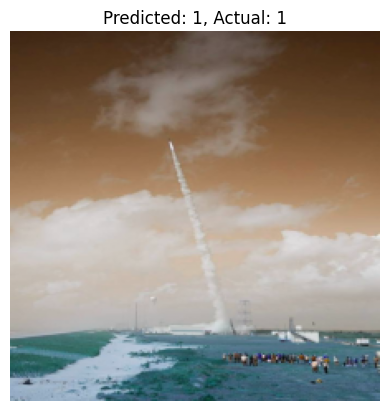

In [64]:
# 이미지를 랜덤으로 골라서 정답을 잘 맞추는지 시각적으로 확인할수도 있습니다.(이미지 색상이)

import matplotlib.pyplot as plt
import numpy as np

# 테스트 데이터에서 무작위로 이미지를 선택
random_idx = np.random.choice(len(X_test))

# 선택한 이미지의 예측 레이블과 실제 레이블을 계산
test_image = np.expand_dims(X_test[random_idx], axis=0)  # 모델의 입력 형태에 맞게 차원을 추가
predicted_label = model.predict(test_image)  # 모델을 사용하여 이미지의 레이블을 예측
predicted_label = np.argmax(predicted_label, axis=1)[0]  # 예측된 레이블의 인덱스를 가져옴

# 예측 결과와 실제 레이블을 비교하여 이미지를 출력
plt.imshow(X_test[random_idx])
plt.title(f"Predicted: {predicted_label}, Actual: {y_test[random_idx]}")
plt.axis('off')
plt.show()